<a href="https://colab.research.google.com/github/A01732830/Examen-1/blob/main/Examen1_valores_nulos_outliers_last_mile_costumer_service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo .cvs sin indice
from google.colab import files #orden que hace que el código busque el documento en la computadora
files.upload()

In [4]:
#Carga desde un archivo .csv sin indice 
last_mile_customer=pd.read_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer.csv")
#carga el documento y se le asigna a una variable con el que se identifica sin un nombre tan grande

In [ ]:
#Verificamos información del DataFrame
last_mile_customer.info() #muestra toda la estructura de los datos del documento

In [ ]:
#Carga desde archivo .csv sin indice
last_mile_customer=pd.read_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer.csv")
last_mile_customer.head() #te deja ver los primeros elementos del documento ya con forma de filas y columnas como excel

In [ ]:
#Corroboramos valores nulos
valores_nulos=last_mile_customer.isnull().sum()
valores_nulos #te muestra las columnas que tienen datos nulos y la cantidad

In [21]:
#Realizamos una copia del dataframe
data2=last_mile_customer.copy()

**Quitar valores nulos (se usaran dos métodos para quitarlos)**

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en concreto 
data2["picture_cargo_being_delivered"]=data2["picture_cargo_being_delivered"].fillna("picture_cargo_being_delivered")
data2 #se usa un método de sustitución que quita los valores nulos y los rellena

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos #se corrobora que haya quitado los nulos de la columna anterior

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico o string en concreto 
data2["picture_cargo_being_delivered_captions"]=data2["picture_cargo_being_delivered_captions"].fillna("picture_cargo_being_delivered")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en concreto
data2["picture_cargo_being_delivered_urls"]=data2["picture_cargo_being_delivered_urls"].fillna("picture_cargo_being_delivered_urls")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [37]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum().sum()
valores_nulos #se usa para poder corrobar que ya no haya ningún valor nulo en ninguna de las columnas

0

**Procedimiento "Cuantiles" para sustituir outliers en dataframe**

<Figure size 1080x576 with 0 Axes>

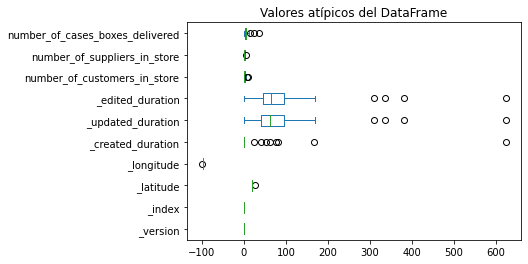

In [38]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8)) #muestra el tamaño en que se muestra la imagen
data2.plot(kind="box",vert=False) #genera la caja o bigote y la grafica de todas las columnas que contengan valores atípicos
plt.title("Valores atípicos del DataFrame") # pone el título a la gráfica
plt.show() #dibujamos el diagrama

In [39]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["number_of_cases_boxes_delivered"] #llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25)#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #se usa un porcentaje de 25 como límite superior
iqr=percentile75 - percentile25 #hace la resta de los límites

Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)  #muestran los valores de los límites permitidos

Limite superior permitido 12.0
Limite interior permitido -4.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr #encuentra los valores que se salen del rango de los límites

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr #genera los datos limpios de la columna sin valores atípicos

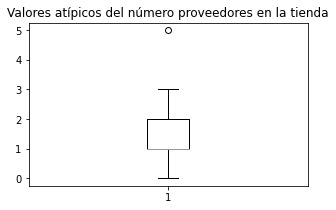

In [42]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3)) #muestra el tamaño de la figura
plt.boxplot(data3_iqr["number_of_suppliers_in_store"]) #gráfica la caja con los valores ya dentro de los límites de una columna
plt.title("Valores atípicos del número proveedores en la tienda") #titulo de la grafica
plt.show() #dibujamos el diagrama

In [43]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

Se hace el mismo procedimiento para todas las columnas con datos atípicos

In [44]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["number_of_suppliers_in_store"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 3.5
Limite interior permitido -0.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

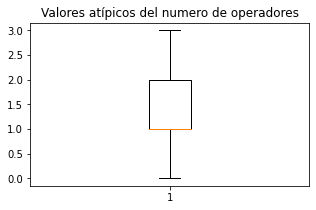

In [47]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["number_of_suppliers_in_store"])
plt.title("Valores atípicos del numero de operadores")
plt.show() #dibujamos el diagrama

In [48]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [49]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["number_of_customers_in_store"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 5.0
Limite interior permitido -3.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["number_of_customers_in_store"])
plt.title("Valores atípicos del numero de comensales en la tienda")
plt.show() #dibujamos el diagrama

In [53]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [54]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["_edited_duration"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 172.0
Limite interior permitido -32.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

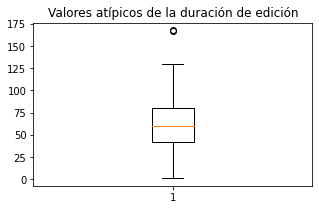

In [57]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["_edited_duration"])
plt.title("Valores atípicos de la duración de edición")
plt.show() #dibujamos el diagrama

In [58]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [59]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["_created_duration"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 0.0
Limite interior permitido 0.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["_created_duration"])
plt.title("Valores atípicos de la duración de edición")
plt.show() #dibujamos el diagrama

In [63]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

**Convertir DataSet sin valores nulos a CSV**

In [64]:
#Convertir DataFrame a CSV
data3_iqr.to_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer_limpio.csv")
#una vez que se quitaron los valores nulos y los atípicos se convierten a un archivo cvs

In [ ]:
#descargar archivo filtrado en csv
from google.colab import files

files.download("lastmile_delivery_operations_mit_lift_lab_serving_customer_limpio.csv")
#se descarga el documento .csv con los datos limpio

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>